**plot for Sarah comparing SSP2-4.5 and SSP2-4.5+MCB**


In [6]:
import sys
print(sys.version)
%matplotlib inline
%run -i ./pjr3

3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
pjr3.py complete


In [7]:
def make_AA_tser(Var):
    ''' make Annual Average from tseries files
        Var: Xarray object
        returns xarray object with annual averages
    '''
    month_length = Var.time.dt.days_in_month
    twgts = month_length.groupby("time.year") / month_length.groupby("time.year").sum()
    V1AY = (Var*month_length).groupby("time.year").sum()/month_length.groupby("time.year").sum()
    #print('V1AY.values', V1AY.values)
    # for some reason, the groupby operator does not propogate the variable name
    V1AY = V1AY.rename(Var.name)
    return V1AY

In [8]:
def bld_fnamea(casename, Varname):
    fname = "/e3sm_prod/phil/timeseries/cesm2-mcb-reshaped/"+casename+"/"+casename+".cam.h0.2015-*."+Varname+".nc"
    return fname

def bld_fnameb(casename, Varname):
    fname = "/e3sm_prod/phil/timeseries/cesm2-mcb-reshaped/CESM2_SSP245/ens001/"+casename+".cam.h0."+Varname+".201501-206412.nc"
    return fname

In [9]:
casename0 = "b.e21.BSSP245smbb.f09_g17.001"  # reference run
casename1 = "b.e21.BSSP245smbb_MCBss7TgYr_R1R2R3.f09_g17.LE2-1011.001"
#casename1 = "b.e21.BSSP245smbb_MCBss10Tgyr_R1R2R4R5.LE2-1011.001"

Varname = 'TS'
ind0 = bld_fnameb(casename0, Varname)
print('ind0',ind0)
DS0 = center_time(xr.open_mfdataset(ind0))
ind1 = bld_fnamea(casename1, Varname)
print('ind1',ind1)
DS1 = center_time(xr.open_mfdataset(ind1))
DS0, DS1 = reconcile_xr_coords(DS0, DS1)
print('DS0.time',len(DS0.time.values))
print('DS1.time',len(DS1.time.values))
if 'area' in DS1:
    area = DS1['area']
elif 'area' in DS0:
    area = DS0['area']
else:
    print('calculating weights')
    lat = DS1['lat'].values
    lon = DS1['lon'].values
    aread = make_fvarea(lon,lat)
    area = xr.DataArray(aread, dims=['lat','lon'], coords={'lon':lon,'lat':lat})
    area.attrs['units']='steradians'
    #print('area',area)
    
yrange_pdb = '2015-01-01'
yrange_pde = '2016-01-01'
#yrange_pdb = '2020-01-01'
#yrange_pde = '2030-01-01'
DS0PD = DS0.sel(time=slice(yrange_pdb,yrange_pde))
DS1PD = DS1.sel(time=slice(yrange_pdb,yrange_pde))
print('Months in DS0',len(DS0PD.time.values),len(DS1PD.time.values))

yrange_fub = '2035-01-01'
yrange_fue = '2036-01-01'
DS0FU = DS0.sel(time=slice(yrange_fub,yrange_fue))
DS1FU = DS1.sel(time=slice(yrange_fub,yrange_fue))
print('Months in DS1',len(DS0FU.time.values),len(DS1FU.time.values))



ind0 /e3sm_prod/phil/timeseries/cesm2-mcb-reshaped/CESM2_SSP245/ens001/b.e21.BSSP245smbb.f09_g17.001.cam.h0.TS.201501-206412.nc
center_time returning DS 2015-01-16 12:00:00 2015-02-15 00:00:00 2064-11-16 00:00:00 2064-12-16 12:00:00
ind1 /e3sm_prod/phil/timeseries/cesm2-mcb-reshaped/b.e21.BSSP245smbb_MCBss7TgYr_R1R2R3.f09_g17.LE2-1011.001/b.e21.BSSP245smbb_MCBss7TgYr_R1R2R3.f09_g17.LE2-1011.001.cam.h0.2015-*.TS.nc
center_time returning DS 2015-01-16 12:00:00 2015-02-15 00:00:00 2064-11-16 00:00:00 2064-12-16 12:00:00
zlon  absent in second object
lev  absent in second object
ilev  absent in second object
DS0.time 600
DS1.time 600
calculating weights
Months in DS0 12 12
Months in DS1 12 12


In [10]:
X0 = xr.open_mfdataset(ind0)
X0

<xarray.Dataset> Size: 133MB
Dimensions:       (lat: 192, zlon: 1, nbnd: 2, lon: 288, lev: 32, ilev: 33,
                   time: 600)
Coordinates:
  * lat           (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * zlon          (zlon) float64 8B 0.0
  * lon           (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * lev           (lev) float64 256B 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 264B 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time          (time) object 5kB 2015-02-01 00:00:00 ... 2065-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/27)
    zlon_bnds     (zlon, nbnd) float64 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
    gw            (lat) float64 2kB dask.array<chunksize=(192,), meta=np.ndarray>
    hyam          (lev) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
    hybm          (lev) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
    P0            float64 8B ...
    hyai          (ilev) float64 264B dask.array<chunksize=(33,), meta=np.ndarray>
    ...            ...
    n2ovmr        (time) float64 5kB dask.array<chunksize=(512,), meta=np.ndarray>
    f11vmr        (time) float64 5kB dask.array<chunksize=(512,), meta=np.ndarray>
    f12vmr        (time) float64 5kB dask.array<chunksize=(512,), meta=np.ndarray>
    sol_tsi       (time) float64 5kB dask.array<chunksize=(512,), meta=np.ndarray>
    nsteph        (time) int32 2kB dask.array<chunksize=(600,), meta=np.ndarray>
    TS            (time, lat, lon) float32 133MB dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              b.e21.BSSP245smbb.f09_g17.001
    logname:           asphilli
    host:              cheyenne2
    initial_file:      b.e21.BHISTsmbb.f09_g17.LE2-1231.011.cam.i.2015-01-01-...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [11]:
TS0PD = make_AA_tser(DS0PD[Varname]).mean(dim='year')
TS1PD = make_AA_tser(DS1PD[Varname]).mean(dim='year')
print(TS0PD.weighted(area).mean().values,TS1PD.weighted(area).mean().values)
TS0FU = make_AA_tser(DS0FU[Varname]).mean(dim='year')
TS1FU = make_AA_tser(DS1FU[Varname]).mean(dim='year')
print(TS0FU.weighted(area).mean().values,TS1FU.weighted(area).mean().values)

289.2872217724161 289.2113507626615
290.0184261082845 288.938855237373


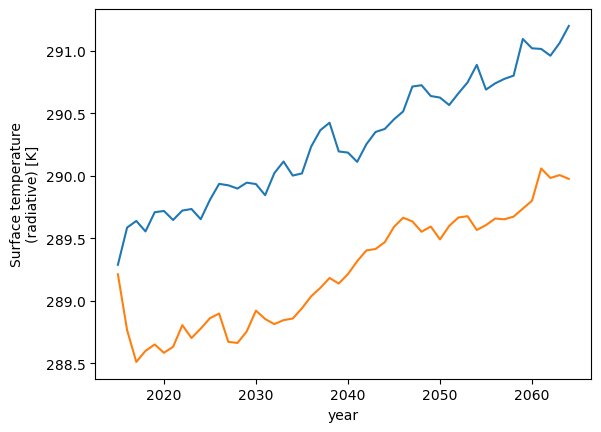

In [12]:
TSP0 = make_AA_tser(DS0[Varname]).weighted(area).mean(dim=['lat','lon'])
TSP0.plot()
TSP1 = make_AA_tser(DS1[Varname]).weighted(area).mean(dim=['lat','lon'])
TSP1.plot()

In [13]:
casename0 = "b.e21.BSSP245smbb.f09_g17.001"  # reference run
casename1 = "b.e21.BSSP245smbb_MCBss7TgYr_R1R2R3.f09_g17.LE2-1011.001"
#casename1 = "b.e21.BSSP245smbb_MCBss10Tgyr_R1R2R4R5.LE2-1011.001"

Varname = 'TS'
   
DV1_CESM, lat_cesm, lon_cesm, area_cesm = get_cesm_diff(casename1, Varname)
DV1_CESM.weighted(area).mean(dim=['lat','lon']).values

NameError: name 'get_cesm_diff' is not defined

In [14]:

D0_TS = TS0FU-TS0PD
D1_TS = TS1FU-TS0PD

In [15]:
TS0FU.name

'TS'

In [16]:
def xr_llhplot2 (xrVar, cbar='default', plotproj=None, ax=None, cax=None,
                 ylabels=None, clevs=None, cmap=None, title=None, cbartitle=None,regmark=False):
    """xr_llhplot xarray lat lon horizontal plot
       returns a "mappable" containing the artist info that is needed to plot a colorbar
       that is
       mpbl = xr_llhplot2()
       plt.colorbar(mpbl, orientation='horizontal',cax=cax,...)
    """
    #print(' entering xr_llhplot', xrVar)
    
    lon=xrVar['lon'].values
    lat=xrVar['lat'].values
    xv,yv=np.meshgrid(lon,lat)
    data_regridded = xrVar.values
    #print('aaa',data_regridded.shape, xv.shape, yv.shape)
    df = data_regridded.flatten()
    dsub = df[np.isfinite(df)] # ignore NaN
    zmax = dsub.max()
    zmin = dsub.min()
    #print('masked interpolated range',zmin,zmax)
    dataproj=ccrs.PlateCarree()    # data is always assumed to be lat/lon
    if ylabels is None: ylabels = True
    if clevs is None:
        clevs = findNiceContours(np.array([zmin,zmax]),nlevs=10)
    #print('clevs',clevs)
    if cmap is None:
        #print('aaa, grabbing cmap default')
        #cmap = mpl.cm.get_cmap()
        cmap = plt.get_cmap()
        #print('bbb',cmap.N)
    #print('cmap',cmap)
    extend = 'both'
    norm = mpl.colors.BoundaryNorm(clevs,cmap.N,extend=extend)
    #print('norm',norm(clevs))
    clat = (lat.min()+lat.max())/2.
    clon = (lon.min()+lon.max())/2.
    if plotproj is None:
        plotproj = ccrs.PlateCarree()
        plotproj = ccrs.Mollweide()
 
    # if no ax argument, could get current axis, or create it
    if ax is None:
        #print('grab current axis')
        #ax = plt.gca()
        ax = plt.axes(projection=plotproj)
        
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=2, color='gray', alpha=0.5)
    pl = ax.contourf(xv, yv, data_regridded, levels=clevs, # vmin=zmin, vmax=zmax,
                     norm=norm, cmap=cmap,
                     extend=extend, transform=ccrs.PlateCarree())
    
    gl.left_labels=ylabels
    gl.right_labels=ylabels
    ax.coastlines(linewidth=1,color='blue')
 
    ## Find the location of the main plot axes
    ## has to be done after some plotting is done in projection space
    posn = ax.get_position()
    
    fig = plt.gcf()
    ax2 = fig.add_axes([0,0,0.1,0.1])
    ax2.set_position([posn.x0-0.005, posn.y0-0.005, posn.width+0.01, posn.height+0.01])
    ax2.patch.set_alpha(0.0)
    ax2.set_axis_off()
    ax2.set_xlim([0,1])
    ax2.set_ylim([0,1])
    if regmark:
        # print some registration marks to help in lining up figures
        ax2.scatter([0,0,1,1], [0,1,0,1], c="r", s=100)

    if not title is None:
        #print('title is ', title)
        #ax2.set_title(title)
        ax2.text(0.01,0.93,title,fontsize=6)

        
    if cbar == 'default':
        # Add colorbar to plot
        if cbartitle is None:
            cbartitle = xrVar.long_name
            
        if cax is not None:
            cax = ax
        else:
            # create an colorbar axis
            cax = fig.add_axes([0,0,0.1,0.1])
            ## Adjust the positioning and orientation of the colorbar
            #ax.set_position([posn.x0, posn.y0-0.06, posn.width, 0.04])
            cax.set_position([posn.x0, posn.y0-0.02, posn.width, 0.015])
    
        cb = plt.colorbar(
             pl, orientation='horizontal',ticks=clevs,cax=cax,
             label='%s (%s)'%(cbartitle, xrVar.units)
             )
        cb.ax.tick_params(labelsize=7)
    
        
    return pl

plotting range -5.353126003317641 7.805921246254286


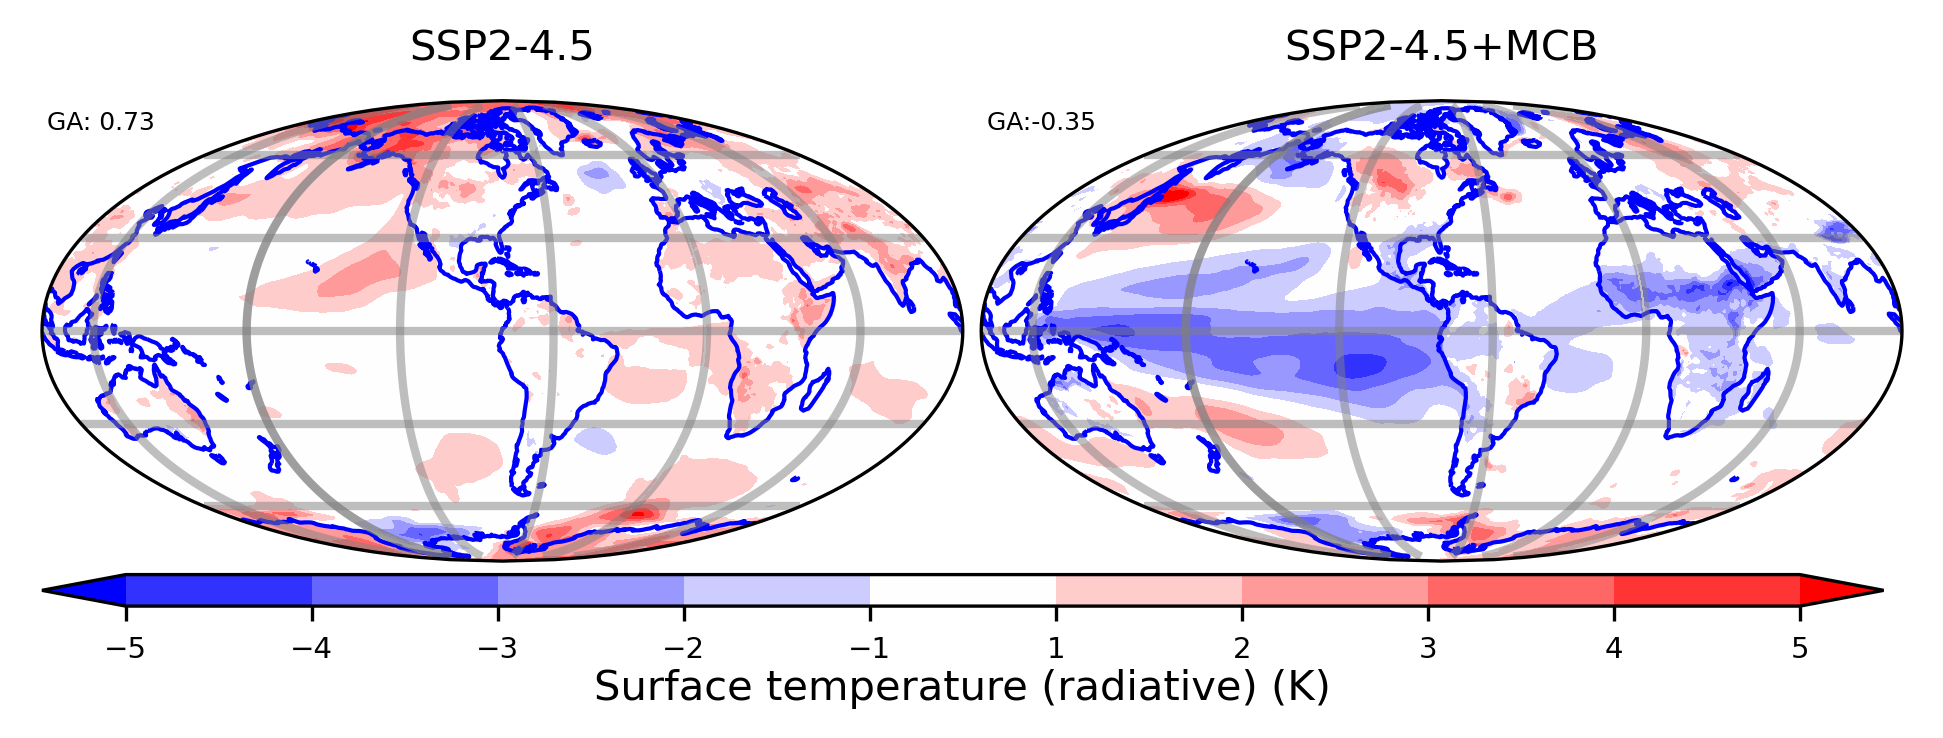

In [17]:
# plot all

def setfign ():
    """
    return fig and axes for a single panel figure
    """
    plotproj = ccrs.Mollweide(central_longitude=-80)
    plotproj._threshold /= 100.
    fig, axes = plt.subplots(ncols=2,nrows=1,
                             #gridspec_kw={'width_ratios': [1]},
                             subplot_kw={'projection': plotproj},
                             figsize=(8.,3.0),
                            )
    plt.subplots_adjust(left=None, bottom=0.2, right=None, top=None, wspace=0.02, hspace=0.05)

    fig.set_dpi(300.0)
    return fig, axes;

def plotall (D0, D1,dmap=None):
    
    fig, axes = setfign()
    axf = axes.flatten()


    lat = D0['lat'].values
    lon = D0['lon'].values
    area = make_fvarea(lon,lat)
    weights = D0.copy()
    weights.data =area
    weights.attrs['units']='1'
    wdims = weights.dims
    weights = weights/(weights.sum(dim=wdims))
    sDSU=' GA:%5.2f' % D0.weighted(weights).mean().values
    sDU= ' GA:%5.2f' % D1.weighted(weights).mean().values

    drmin = np.min([D0.min(), D1.min()])
    drmax = np.max([D0.max(), D1.max()])
    print('plotting range', drmin, drmax)
    factor = 0.7
    dlevs = findNiceContours(np.array([drmin,drmax])*factor,nlevs = 15,rmClev=0.,sym=True)
    #dlevs = np.array([-10.,-5.,-4.,-3.,-2.,-1.,1.,2.,3.,4.,5.,10.])
    #dlevs = np.array([-15,-10.,-5.,-4.,-3.,-2.,-1.,1.,2.,3.,4.,5.,10.,15])
    
    if dmap is None:
        dmap = diverge_map()

    xr_llhplot2(D0, ax=axf[0],clevs=dlevs,cmap=dmap,title=sDSU, ylabels=False,cbar=None)
    posn = axf[0].get_position()
    ax2 = fig.add_axes([0,0,0.1,0.1])
    ax2.set_position([posn.x0-0.005, posn.y0-0.005, posn.width+0.01, posn.height+0.01])
    ax2.patch.set_alpha(0.0)
    ax2.set_axis_off()
    ax2.set_xlim([0,1])
    ax2.set_ylim([0,1])
    ax2.text(0.5,1.1,'SSP2-4.5',fontsize=10,va='center',ha='center')
    #pltllbox2([-150.,-110.],[0.,30.],ax=axf[4])
    #pltllbox2([-110.,-70.],[-30.,0.],ax=axf[4])
    #pltllbox2([-25.,15.],[-30.,0.],ax=axf[4])

    pl = xr_llhplot2(D1, ax=axf[1],clevs=dlevs,cmap=dmap,title=sDU, ylabels=False,cbar=None)
    posn = axf[1].get_position()
    ax2 = fig.add_axes([0,0,0.1,0.1])
    ax2.set_position([posn.x0-0.005, posn.y0-0.005, posn.width+0.01, posn.height+0.01])
    ax2.patch.set_alpha(0.0)
    ax2.set_axis_off()
    ax2.set_xlim([0,1])
    ax2.set_ylim([0,1])
    ax2.text(0.5,1.1,'SSP2-4.5+MCB',fontsize=10,va='center',ha='center')
    #pltllbox2([-150.,-110.],[0.,30.],ax=axes[4])
    #pltllbox2([-110.,-70.],[-30.,0.],ax=axes[4])
    #pltllbox2([-25.,15.],[-30.,0.],ax=axes[4])

    
    if True:
        ## Find the location of the main plot axes
        ## has to be done after some plotting is done in projection space
        pos0 = axf[0].get_position()
        pos1 = axf[1].get_position()
        # create an colorbar axis
        cax = fig.add_axes([0,0,0.1,0.1])
        ## Adjust the positioning and orientation of the colorbar
        xof = 0.0
        xl = pos0.x0-xof
        yb = pos0.y0-0.05
        xw = pos0.width+pos1.width+xof
        yh = 0.035
        cax.set_position([xl, yb, xw, yh])
        #cax.set_position([posn.x0, posn.y0-0.02, posn.width, 0.015])
        #cax.set_ylim([-1,1])
        cb = plt.colorbar(
             pl, orientation='horizontal',ticks=dlevs,cax=cax, 
             #label='%s (%s)'%(cbartitle, xrVar.units)
             )
        cb.ax.tick_params(labelsize=7)
        cax.text(0.,-2.6,'%s (%s)'%(D0.long_name, D0.units),va='center',ha='center')
        plt.savefig('For_Sarah_'+D0.name+'.pdf',format='pdf',dpi=300,transparent=True)#,facecolor='xkcd:mint green')
        plt.show()
    

#
plotall (D0_TS, D1_TS)


In [18]:
# disable cells below
1./0.

ZeroDivisionError: float division by zero

In [ ]:
# plot all models

def setfign ():
    """
    return fig and axes for a single panel figure
    """
    plotproj = ccrs.Mollweide(central_longitude=-80)
    plotproj._threshold /= 100.
    fig, axes = plt.subplots(ncols=3,nrows=2,
                             #gridspec_kw={'width_ratios': [1]},
                             subplot_kw={'projection': plotproj},
                             figsize=(8.,3.0),
                            )
    plt.subplots_adjust(left=None, bottom=0.2, right=None, top=None, wspace=0.02, hspace=0.05)

    fig.set_dpi(300.0)
    return fig, axes;

def plotall (D0, DS1,dmap=None):
    
    fig, axes = setfign()
    axf = axes.flatten()

    lat = D0['lat'].values
    lon = D0['lon'].values
    area = make_fvarea(lon,lat)
    weights = D0.copy()
    weights.data =area
    weights.attrs['units']='1'
    wdims = weights.dims
    weights = weights/(weights.sum(dim=wdims))
    sD0=' GA:%5.2f' % D0.weighted(weights).mean().values
    sD1= ' GA:%5.2f' % D1.weighted(weights).mean().values

    drmin = np.min([D0.min(), D1.min()])
    drmax = np.max([D0.max(), D1.max()])
    print('plotting range', drmin, drmax)
    factor = 0.7
    dlevs = findNiceContours(np.array([drmin,drmax])*factor,nlevs = 15,rmClev=0.,sym=True)
    
    if dmap is None:
        dmap = diverge_map()

    xr_llhplot2(D1, ax=axf[1],clevs=dlevs,cmap=dmap,title=sDSCESM, ylabels=False,cbar=None)
    pl = xr_llhplot2(D0, ax=axf[0],clevs=dlevs,cmap=dmap,title=sDCESM, ylabels=False,cbar=None)
    if False:
        pos0 = axf[0].get_position() 
        pos1 = axf[1].get_position()
        ax2 = fig.add_axes([0,0,0.1,0.1])
        posxmid = (pos0.x0 + pos1.x0)*0.5
        posxwidth = (pos0.width + pos1.width)
        ax2.set_position([posxmid-0.005, pos0.y0-0.005, posxwidth+0.01, pos0.height+0.01])
        ax2.patch.set_alpha(0.0)
        ax2.set_axis_off()
        ax2.set_xlim([0,1])
        ax2.set_ylim([0,1])
        ax2.text(0.5,1.1,'D0',fontsize=10,va='center',ha='center')
        ## Find the location of the main plot axes
        ## has to be done after some plotting is done in projection space
    posn = axf[1].get_position()
    # create an colorbar axis
    cax = fig.add_axes([0,0,0.1,0.1])
    ## Adjust the positioning and orientation of the colorbar
    xof = 0.15
    cax.set_position([posn.x0-xof, posn.y0-0.05, posn.width+2*xof, 0.035])
    #cax.set_position([posn.x0, posn.y0-0.02, posn.width, 0.015])
    #cax.set_ylim([-1,1])
    cb = plt.colorbar(
         pl, orientation='horizontal',ticks=dlevs,cax=cax, 
         #label='%s (%s)'%(cbartitle, xrVar.units)
         )
    cb.ax.tick_params(labelsize=7)
    cax.text(0.,-2.6,'%s (%s)'%(DCESM.long_name, DCESM.units),va='center',ha='center')
    plt.savefig('CS_compare_'+DCESM.name+'.pdf',format='pdf',dpi=300,transparent=True)#,facecolor='xkcd:mint green')
    plt.show()


#
plotall (D0_TS, D1_TS,dmap=tcmap)

In [ ]:
def get_cesm_diff(casename, Varname):
    
    casename0 = "b.e21.BSSP245smbb.f09_g17.001"  # reference run

    def bld_fname2(casename, Varname):
        fname = "/e3sm_prod/phil/timeseries/cesm2-mcb-reshaped/"+casename+"/"+casename+".cam.h0.2015-*."+Varname+".nc"
        return fname

    def bld_fname3(casename, Varname):
        fname = "/e3sm_prod/phil/timeseries/cesm2-mcb-reshaped/CESM2_SSP245/ens001/"+casename+".cam.h0."+Varname+".201501-206412.nc"
        return fname

    ind0 = bld_fname3(casename0, Varname)
    print('ind0',ind0)
    DS0 = center_time(xr.open_mfdataset(ind0))
    ind1 = bld_fname2(casename, Varname)
    print('ind1',ind1)
    DS1 = center_time(xr.open_mfdataset(ind1))
    DS0, DS1 = reconcile_xr_coords(DS0, DS1)
    print('DS0.time',len(DS0.time.values))
    print('DS1.time',len(DS1.time.values))
    
    # grab part of the data
    #DS0 = DS0.isel(time=slice(0,120))
    yb = '2020-01-01'
    ye = '2030-01-01'
    DS0 = DS0.sel(time=slice(yb,ye))
    DS1 = DS1.sel(time=slice(yb,ye))
    print('after slicing time')
    print('DS0', len(DS0.time.values))
    print('DS1', len(DS1.time.values))
    
    long_name = None
    if Varname == 'PRECT': long_name = 'Precip'
    if Varname == 'TS': long_name = "Surface Temperature"
    
    C0 = xr_getvar(Varname, DS0,long_name=long_name).mean(dim="time")
    C1 = xr_getvar(Varname, DS1,long_name=long_name).mean(dim="time")
    
    D1 = C1-C0
     
    if 'area' in DS1:
        area = DS1['area']
    elif 'area' in DS0:
        area = DS0['area']
    else:
        print('calculating weights')
        lat = DS1['lat'].values
        lon = DS1['lon'].values
        aread = make_fvarea(lon,lat)
        area = xr.DataArray(aread, dims=['lat','lon'], coords={'lon':lon,'lat':lat})
        area.attrs['units']='steradians'
        #print('area',area)


    #print('weights sum',weights.shape,weights.sum(dim=wdims).values)
    return D1, lat, lon, area